# k Nearest Neighbors (kNN)

The k nearest neighbors algorithm (kNN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

* In kNN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

* In kNN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  

### Load the data from CSV file

In [2]:
cust = pd.read_csv('data/telco_customer_churn.csv')

In [3]:
display(HTML(cust.head().to_html()))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the Column Types

In [4]:
cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Convert String labels to Numeric

In [5]:
cust['Churn'] = np.where(cust['Churn']=='Yes',1,0)

### Select features to Train the model

In [6]:
cust = cust[['gender','MonthlyCharges','tenure','Churn']]

### Split the data set into Train and Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cust.drop(columns = ['Churn'], axis=1), cust['Churn'], test_size=0.2, random_state=2018, shuffle=True)

### Encode the categorical variables

In [8]:
print(X_train.shape)
print(X_test.shape)

(5634, 3)
(1409, 3)


In [9]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [10]:
print(X_train.shape)
print(X_test.shape)

(5634, 4)
(1409, 4)


### Rescaling the Data

In [11]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [12]:
print(X_train)

[[-1.48864379 -0.62745392 -0.98835323  0.98835323]
 [-0.81536245  0.1871265  -0.98835323  0.98835323]
 [ 0.50792631 -1.11620218  1.01178402 -1.01178402]
 ..., 
 [ 0.817137    0.51295867  1.01178402 -1.01178402]
 [-0.51446388 -1.23838925 -0.98835323  0.98835323]
 [ 1.21113127  1.20535204  1.01178402 -1.01178402]]


### Train k Nearest Neighbors (kNN) Classifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

In [14]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Predict on the Test dataset using the Trained model

In [15]:
pred_test = knn.predict(X_test)
pred_test_prob = knn.predict_proba(X_test)

### Evaluate the model performance

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

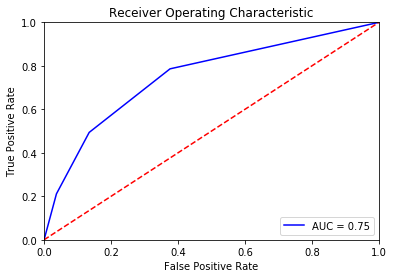

In [17]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Area Under the Curve (AUC)

In [18]:
metrics.roc_auc_score(y_test, pred_test_prob[:,1])

0.75005394616173049

#### Overall Accuracy

In [19]:
metrics.accuracy_score(y_test, pred_test)

0.75798438608942509

### Optimize for the best k by assessing Training and Validation Error

#### Training Error

In [20]:
train_error = []

# Calculating training error for K values between 1 and 50
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    train_error.append(np.mean(pred_i != y_train))

Text(0,0.5,'Training Error')

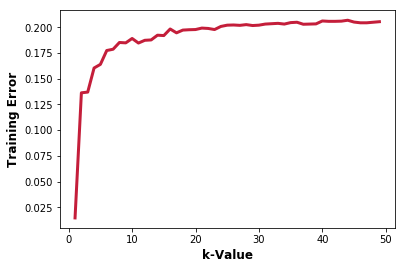

In [21]:
plt.plot(range(1, 50), train_error, color='#c41e3a', linestyle='-',linewidth=3)
plt.xlabel('k-Value', fontsize=12, fontweight='bold')  
plt.ylabel('Training Error', fontsize=12, fontweight='bold') 

#### Validation/Testing Error

In [22]:
test_error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    test_error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Validation Error')

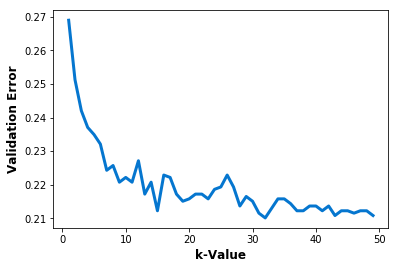

In [24]:
plt.plot(range(1, 50), test_error, color='#0576cf', linestyle='-',linewidth=3)
plt.xlabel('k-Value', fontsize=12, fontweight='bold')  
plt.ylabel('Validation Error', fontsize=12, fontweight='bold') 

### From the above analysis, we can pick k=8

In [25]:
knn = KNeighborsClassifier(n_neighbors=8)
knn = knn.fit(X_train, y_train)

In [26]:
pred_test = knn.predict(X_test)
pred_test_prob = knn.predict_proba(X_test)

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

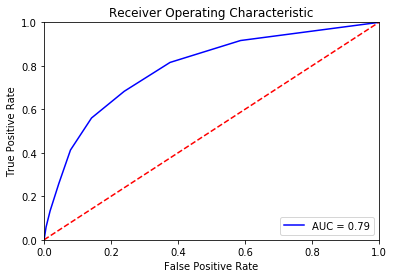

In [28]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We observed improvement in AUC compared to our previous run with k=3